USING GAUGE AND SATELLITE DATASETS (SatA and SatB) TO QUANTIFY THE ERRORS AND ACCURACIES WITHIN THE SATELLITE DATASETS

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from sklearn.metrics import mean_absolute_error, mean_squared_error

READING THE DATA

In [2]:
gauge_data_Accra= xr.open_dataset('Accra_gauge.nc')
gauge_data_kumasi= xr.open_dataset('Kumasi_gauge.nc')
Accra_SatA=xr.open_dataset('Accra_SatA.nc')
Accra_SatB=xr.open_dataset('Accra_SatB.nc')
Kumasi_SatA=xr.open_dataset('Kumasi_SatA.nc')
Kumasi_SatB=xr.open_dataset('Kumasi_SatB.nc')

ACCRA

USING REQUIRED DIMENTION FOR NORMALIZATION

In [3]:
Accragauge_data=gauge_data_Accra.sel(lon=-0.19, lat=5.60, method='nearest')
AccrasatA_data=Accra_SatA.sel(lon=-0.19, lat=5.60, method='nearest')
AccrasatB_data=Accra_SatB.sel(lon=-0.19, lat=5.60, method='nearest')

SELECTING PRECIPITATION AND GROUPING BY TIME.MONTH

In [4]:
gauge_Accra=Accragauge_data['precip']
guageAP =gauge_Accra.groupby('time.month').mean()
SatAP_Accra=AccrasatA_data['pre']
AsatA_precip = SatAP_Accra.groupby('time.month').mean()
ASatB=AccrasatB_data['precip']
AsatB_precip=ASatB.groupby('time.month').mean()

EXTRACTING THE VALUES FOR THE SATELLITE AND GAUGE PRECIPITATION DATA

In [5]:
Accra_gauge1= guageAP.data
Accra_satA1= AsatA_precip.data
Accra_satB1= AsatB_precip.data

In [6]:
month = ['Jan', 'Feb', 'March', 'April', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
data = {'month': month, 
        'AccraGauge': Accra_gauge1, 
        'AccrasatA': Accra_satA1,"AccrasatB":Accra_satB1 }
Accra_df = pd.DataFrame(data=data)
Accra_df

,month,AccraGauge,AccrasatA,AccrasatB
0,Jan,8.540159,15.995239,17.815241
1,Feb,16.395304,27.966665,32.788570
2,March,51.106579,70.761909,79.582855
3,April,94.385422,113.033333,112.185707
4,May,144.088928,156.671432,153.525726
5,Jun,161.900360,188.938095,187.166183
6,Jul,65.193138,82.990486,88.259521
7,Aug,23.391615,38.219048,45.588097
8,Sep,50.627918,85.861900,74.038094
9,Oct,59.662731,127.780960,107.182861


Calculating error metrics

In [7]:
def calculate_errors(true, pred):
    mae = mean_absolute_error(true, pred)
    rmse = np.sqrt(mean_squared_error(true, pred))
    mbe = np.mean(pred - true)
    return mae, rmse, mbe

Calculating errors for SATA

In [8]:
mae_A, rmse_A, mbe_A = calculate_errors(Accra_df['AccraGauge'], Accra_df['AccrasatA'])
# Printing error metrics
print('SatA Errors:')
print('MAE:', mae_A)
print('RMSE:', rmse_A)
print('MBE:', mbe_A)

SatA Errors:
MAE: 21.300135
RMSE: 26.931318
MBE: 21.140396


Text(0.5, 1.0, 'Accra Gauge vs Accra SatA')

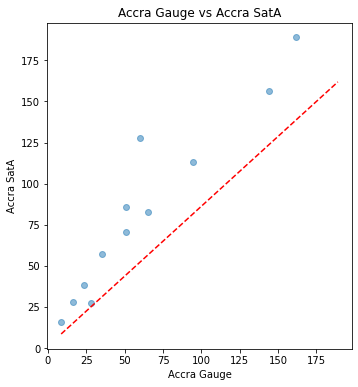

In [23]:
# Visualize errors
plt.figure(figsize=(12, 6), facecolor='white')

plt.subplot(1, 2, 1)
plt.scatter(Accra_df['AccraGauge'], Accra_df['AccrasatA'], alpha=0.5)
plt.plot([Accra_df['AccraGauge'].min(), Accra_df['AccrasatA'].max()], [Accra_df['AccraGauge'].min(), Accra_df['AccraGauge'].max()], 'r--')
plt.xlabel('Accra Gauge')
plt.ylabel('Accra SatA')
plt.title('Accra Gauge vs Accra SatA')

Calculating errors for Accra SatB

In [9]:
mae_B, rmse_B, mbe_B = calculate_errors(Accra_df['AccraGauge'], Accra_df['AccrasatB'])
# Printing error metrics
print('SatB Errors:')
print('MAE:', mae_B)
print('RMSE:', rmse_B)
print('MBE:', mbe_B)

SatB Errors:
MAE: 20.997774
RMSE: 23.601776
MBE: 20.997774


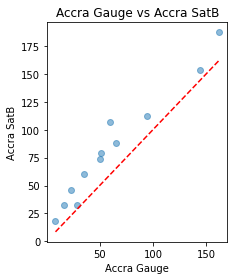

In [25]:
plt.subplot(1, 2, 2)
plt.scatter(Accra_df['AccraGauge'], Accra_df['AccrasatB'], alpha=0.5)
plt.plot([Accra_df['AccraGauge'].min(), Accra_df['AccraGauge'].max()], [Accra_df['AccraGauge'].min(), Accra_df['AccraGauge'].max()], 'r--')
plt.xlabel('Accra Gauge')
plt.ylabel('Accra SatB')
plt.title('Accra Gauge vs Accra SatB')
plt.tight_layout()
plt.show()

In [12]:
# Recommendations based on results
if mae_A < mae_B:
    print('For Accra SatA has a lower Mean Absolute Error compared to SatB.')
else:
    print('For Accra SatB has a lower Mean Absolute Error compared to SatA.')

if rmse_A < rmse_B:
    print('For Accra SatA has a lower Root Mean Squared Error compared to SatB.')
else:
    print('For Accra SatB has a lower Root Mean Squared Error compared to SatA.')

if mbe_A < mbe_B:
    print('For Accra SatA has a lower Mean Bias Error compared to SatB.')
else:
    print('For Accra SatB has a lower Mean Bias Error compared to SatA.')

For Accra SatB has a lower Mean Absolute Error compared to SatA.
For Accra SatB has a lower Root Mean Squared Error compared to SatA.
For Accra SatB has a lower Mean Bias Error compared to SatA.


Based on the analysis of the above satellite data for Accra, it's evident that SatB exhibits lower errors compared to SatA.The lower Mean Absolute Error (MAE) indicates that on average, SatelliteB's predictions are closer to the actual values compared to SatelliteA.
The lower Root Mean Squared Error (RMSE) is Similar to MAE, a lower RMSE suggests SatelliteB's errors are generally smaller in magnitude.
The lower Mean Bias Error (MBE) also implies that SatelliteB's predictions are less consistently skewed in one direction (overestimation or underestimation) compared to SatelliteA.                                   
                                     RECOMMENDATION

    
Use SatelliteB for data collection in Accra: Given its superior performance across multiple metrics, SatelliteB is the more reliable choice for gathering data in Accra.

KUMASI

USING REQUIRED DIMENTION FOR NORMALIZATION

In [13]:
Kumasigauge_data=gauge_data_kumasi.sel(lon=-0.19, lat=5.60, method='nearest')
KumasisatA_data=Kumasi_SatA.sel(lon=-0.19, lat=5.60, method='nearest')
KumasisatB_data=Kumasi_SatB.sel(lon=-0.19, lat=5.60, method='nearest')

SELECTING PRECIPITATION AND GROUPING BY TIME.MONTH

In [14]:
gauge_Kumasi=Kumasigauge_data['precip']
guageKP =gauge_Kumasi.groupby('time.month').mean()
SatAP_Kumasi=KumasisatA_data['pre']
KsatA_precip = SatAP_Kumasi.groupby('time.month').mean()
kSatB=KumasisatB_data['precip']
KsatB_precip=kSatB.groupby('time.month').mean()

EXTRACTING THE VALUES FOR THE SATELLITE AND GAUGE PRECIPITATION DATA

In [15]:
Kumasi_gauge1= guageKP.data
Kumasi_satA1= KsatA_precip.data
Kumasi_satB1= KsatB_precip.data

In [16]:
month = ['Jan', 'Feb', 'March', 'April', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
data = {'month': month, 
        'KumasiGauge': Kumasi_gauge1, 
        'KumasisatA': Kumasi_satA1,"KumasisatB":Kumasi_satB1 }
Kumasi_df = pd.DataFrame(data=data)
Kumasi_df

,month,KumasiGauge,KumasisatA,KumasisatB
0,Jan,13.716414,12.833333,19.991428
1,Feb,52.781338,51.628574,49.428093
2,March,96.839005,92.790474,102.102852
3,April,168.641022,152.923798,164.381897
4,May,162.736862,177.357147,172.738083
5,Jun,193.893036,184.185730,201.538574
6,Jul,117.191360,122.757141,117.829529
7,Aug,69.641823,77.471428,77.853333
8,Sep,163.805054,136.533325,162.909515
9,Oct,195.762207,159.742859,162.732849


Calculating errors for Kumasi SATA

In [17]:
mae_KA, rmse_KA, mbe_KA = calculate_errors(Kumasi_df['KumasiGauge'], Kumasi_df['KumasisatA'])
# Printing error metrics
print('SatA Errors:')
print('MAE:', mae_KA)
print('RMSE:', rmse_KA)
print('MBE:', mbe_KA)

SatA Errors:
MAE: 10.8733835
RMSE: 15.100536
MBE: -5.570867


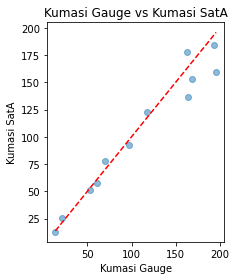

In [27]:
plt.subplot(1, 2, 2)
plt.scatter(Kumasi_df['KumasiGauge'], Kumasi_df['KumasisatA'], alpha=0.5)
plt.plot([Kumasi_df['KumasiGauge'].min(), Kumasi_df['KumasiGauge'].max()], [Kumasi_df['KumasiGauge'].min(), Kumasi_df['KumasiGauge'].max()], 'r--')
plt.xlabel('Kumasi Gauge')
plt.ylabel('Kumasi SatA')
plt.title('Kumasi Gauge vs Kumasi SatA')
plt.tight_layout()
plt.show()

Calculating errors for Kumasi SatB

In [18]:
mae_KB, rmse_KB, mbe_KB = calculate_errors(Kumasi_df['KumasiGauge'], Kumasi_df['KumasisatB'])
# Printing error metrics
print('SatB Errors:')
print('MAE:', mae_KB)
print('RMSE:', rmse_KB)
print('MBE:', mbe_KB)

SatB Errors:
MAE: 7.8248334
RMSE: 11.2491255
MBE: -0.15333064


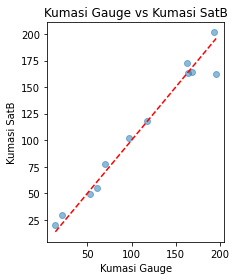

In [28]:
plt.subplot(1, 2, 2)
plt.scatter(Kumasi_df['KumasiGauge'], Kumasi_df['KumasisatB'], alpha=0.5)
plt.plot([Kumasi_df['KumasiGauge'].min(), Kumasi_df['KumasiGauge'].max()], [Kumasi_df['KumasiGauge'].min(), Kumasi_df['KumasiGauge'].max()], 'r--')
plt.xlabel('Kumasi Gauge')
plt.ylabel('Kumasi SatB')
plt.title('Kumasi Gauge vs Kumasi SatB')
plt.tight_layout()
plt.show()

In [20]:
# Recommendations based on results
if mae_KA < mae_KB:
    print('For Kumasi SatA has a lower Mean Absolute Error compared to SatB.')
else:
    print('For Kumasi SatB has a lower Mean Absolute Error compared to SatA.')

if rmse_KA < rmse_KB:
    print('For Kumasi SatA has a lower Root Mean Squared Error compared to SatB.')
else:
    print('For Kumasi SatB has a lower Root Mean Squared Error compared to SatA.')

if mbe_KA < mbe_KB:
    print('For Kumasi SatA has a lower Mean Bias Error compared to SatB.')
else:
    print('For Kumasi SatB has a lower Mean Bias Error compared to SatA.')

For Kumasi SatB has a lower Mean Absolute Error compared to SatA.
For Kumasi SatB has a lower Root Mean Squared Error compared to SatA.
For Kumasi SatA has a lower Mean Bias Error compared to SatB.


Lower Mean Absolute Error (MAE) and Lower Root Mean Squared Error (RMSE) for SatB, On average, SatB's predictions are closer to the actual values and its errors are generally smaller than SatA. This indicates SatB might be more accurate overall.
Lower Mean Bias Error (MBE) for SatA means SatA's predictions are less consistently skewed in one direction (overestimation or underestimation) compared to SatB. This suggests SatA might be more systematic in its errors.

Recommendations:

Considering the impact of errors: Think about how these errors affect your application. If random errors (indicated by MAE and RMSE) are more concerning, SatB might be preferable. If consistent bias (indicated by MBE) is a bigger issue, SatA might be a better choice.

Evaluating the bias in SatB: Investigate why SatB has a higher bias. Can the data be corrected to account for this bias?

Explore combining data: If possible, consider using data from both satellites and applying techniques to account for their respective biases. This could potentially yield a more comprehensive and accurate dataset.